<a href="https://colab.research.google.com/github/rachocr/CCDATSCL_PROJECT/blob/main/FINALS_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
# ==========================================
# CELL 1: SETUP & LIBRARIES
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm # For Advanced Regression
import glob
import os

# Set visual style (Ref: Designing Effective Data Viz Slides)
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries Loaded.")

Libraries Loaded.


In [98]:
# ==========================================
# CELL 2: RUBRIC A - DATA COLLECTION
# ==========================================

# 1. Obtain Data
!git clone https://github.com/rachocr/CCDATSCL_PROJECT.git

# 2. Merge Weekly Files (Your Original Scratch Logic)
csv_files = sorted(glob.glob('CCDATSCL_PROJECT/Dataset/Week *.csv'))
week_dfs = []
for file in csv_files:
    df_temp = pd.read_csv(file)
    week_dfs.append(df_temp)

merged_df = pd.concat(week_dfs, ignore_index=True)

# 3. Initial Standardization (Ref: Data Wrangling Slide 12)
merged_df.columns = [c.replace(' ', '_').replace('(', '').replace(')', '').strip('_') for c in merged_df.columns]
merged_df['Type_of_Coffee'] = merged_df['Type_of_Coffee'].fillna('No Coffee')

print(f"✅ Data Collection Complete. Merged Rows: {len(merged_df)}")
display(merged_df.head())

fatal: destination path 'CCDATSCL_PROJECT' already exists and is not an empty directory.
✅ Data Collection Complete. Merged Rows: 58


,Date,Coffee_Intake__oz,Caffeine_Amount_mg,Type_of_Coffee,Brand,Flavor,Sugar_Level,Creamer_Level,Focus_Rating,Productivity_Duration_Hours,Sleep_Hours,Tasks_Completed,Tasks_Note
0,06/12/2025,16,120,Latte,Grill & Grind,Spanish Latte,Medium,Medium,3,4,10,3,"Fix motorcycle, Clean House, Pet Medication"
1,07/12/2025,24,297,Brewed,Dunkin' Donut,Iced Coffee,Medium,Medium,4,3,9,2,"Studying Java, Pet Medication"
2,08/12/2025,16,120,Latte,Pickup Coffee,Spanish Latte,Medium,Medium,3,2,6,2,"Fix motorcycle, Pet Medication"
3,09/12/2025,16,120,Latte,Pickup Coffee,Spanish Latte,Medium,Medium,3,2,7,2,"Studying Java, Pet Medication"
4,10/12/2025,16,120,Latte,Pickup Coffee,Spanish Latte,Medium,Medium,4,2,9,3,"Studying Java, Pet Medication, Applied Interns..."


In [99]:
display(merged_df.head())

,Date,Coffee_Intake__oz,Caffeine_Amount_mg,Type_of_Coffee,Brand,Flavor,Sugar_Level,Creamer_Level,Focus_Rating,Productivity_Duration_Hours,Sleep_Hours,Tasks_Completed,Tasks_Note
0,06/12/2025,16,120,Latte,Grill & Grind,Spanish Latte,Medium,Medium,3,4,10,3,"Fix motorcycle, Clean House, Pet Medication"
1,07/12/2025,24,297,Brewed,Dunkin' Donut,Iced Coffee,Medium,Medium,4,3,9,2,"Studying Java, Pet Medication"
2,08/12/2025,16,120,Latte,Pickup Coffee,Spanish Latte,Medium,Medium,3,2,6,2,"Fix motorcycle, Pet Medication"
3,09/12/2025,16,120,Latte,Pickup Coffee,Spanish Latte,Medium,Medium,3,2,7,2,"Studying Java, Pet Medication"
4,10/12/2025,16,120,Latte,Pickup Coffee,Spanish Latte,Medium,Medium,4,2,9,3,"Studying Java, Pet Medication, Applied Interns..."


In [100]:
display(merged_df.tail())

,Date,Coffee_Intake__oz,Caffeine_Amount_mg,Type_of_Coffee,Brand,Flavor,Sugar_Level,Creamer_Level,Focus_Rating,Productivity_Duration_Hours,Sleep_Hours,Tasks_Completed,Tasks_Note
53,28/01/2026,0,0,No Coffee,NaN,NaN,NaN,NaN,1,3,8,3,"Doom Scrolled, Took A Rest, Sleep Schedule Was..."
54,29/01/2026,12,140,Brewed,McDo,Premium Roast,Medium,Medium,4,7,6,6,Brainstormed With My Brother With Our Plans Th...
55,30/01/2026,16,150,Latte,Starbucks,Vanilla Latte,High,High,3,5,7,4,"Went To Mall With My Brother, Went To Some Lap..."
56,31/01/2026,0,0,No Coffee,NaN,NaN,NaN,NaN,2,2,9,2,"Caffeine Detox, Unti unti na inaacid"
57,01/02/2026,0,0,No Coffee,NaN,NaN,NaN,NaN,1,2,8,2,"I need some break with this coffee addiction, ..."


In [101]:
display(merged_df.isna().sum())

,0
Date,0
Coffee_Intake__oz,0
Caffeine_Amount_mg,0
Type_of_Coffee,0
Brand,6
Flavor,6
Sugar_Level,6
Creamer_Level,6
Focus_Rating,0
Productivity_Duration_Hours,0


In [102]:
# ==========================================
# CELL 3: RUBRIC B - DATA CLEANING & PREPARATION
# ==========================================

# 1. MANUAL MAPPINGS (Replacing the need for a Reference Table CSV)
sugar_map = {'Low': 12.5, 'Medium': 22.5, 'High': 40.0}
creamer_map = {'Low': 90.0, 'Medium': 135.0, 'High': 185.0}

# Coffee Type Mapping (Standardizing Categories)
coffee_type_map = {
    'Cold Brew': 'Brewed',
    'Matcha': 'Latte',
    'Americano': 'Espresso',
    'Frappuccino': 'Latte'
}

# 2. Advanced Cleaning Pipeline (Method Chaining)
df_clean = (
    merged_df
    # 3. Numeric Conversion & Formatting (Your Requested Logic)
    .assign(
        Date = lambda x: pd.to_datetime(x['Date'], dayfirst=True),
        Caffeine_Amount_mg = lambda x: pd.to_numeric(x['Caffeine_Amount_mg'], errors='coerce'),
        Tasks_Completed = lambda x: pd.to_numeric(x['Tasks_Completed'], errors='coerce'),

        # 4. Applying Manual Mappings
        Type_of_Coffee = lambda x: x['Type_of_Coffee'].replace(coffee_type_map),
        Est_Sugar_g = lambda x: x['Sugar_Level'].replace(sugar_map),
        Est_Creamer_mL = lambda x: x['Creamer_Level'].replace(creamer_map),

        # Discretization (Ref: Data Discretization PPT)
        Caffeine_Level = lambda x: pd.cut(
            x['Caffeine_Amount_mg'],
            bins=[0.1, 100, 200, 1000],
            labels=['Low', 'Medium', 'High']
        )
    )
    # 5. Drop Redundant Columns (week and Tasks_Note)
    .drop(columns=['week', 'Tasks_Note'], errors='ignore')
    .dropna(subset=['Tasks_Completed'])
)

print("✅ Data Scrubbed, Standardized & Enriched Manually.")
print(f"Final Variables: {df_clean.columns.tolist()}")
display(df_clean.head())

✅ Data Scrubbed, Standardized & Enriched Manually.
Final Variables: ['Date', 'Coffee_Intake__oz', 'Caffeine_Amount_mg', 'Type_of_Coffee', 'Brand', 'Flavor', 'Sugar_Level', 'Creamer_Level', 'Focus_Rating', 'Productivity_Duration_Hours', 'Sleep_Hours', 'Tasks_Completed', 'Est_Sugar_g', 'Est_Creamer_mL', 'Caffeine_Level']


/tmp/ipython-input-564158876.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Est_Sugar_g = lambda x: x['Sugar_Level'].replace(sugar_map),
/tmp/ipython-input-564158876.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Est_Creamer_mL = lambda x: x['Creamer_Level'].replace(creamer_map),


,Date,Coffee_Intake__oz,Caffeine_Amount_mg,Type_of_Coffee,Brand,Flavor,Sugar_Level,Creamer_Level,Focus_Rating,Productivity_Duration_Hours,Sleep_Hours,Tasks_Completed,Est_Sugar_g,Est_Creamer_mL,Caffeine_Level
0,2025-12-06,16,120,Latte,Grill & Grind,Spanish Latte,Medium,Medium,3,4,10,3,22.5,135.0,Medium
1,2025-12-07,24,297,Brewed,Dunkin' Donut,Iced Coffee,Medium,Medium,4,3,9,2,22.5,135.0,High
2,2025-12-08,16,120,Latte,Pickup Coffee,Spanish Latte,Medium,Medium,3,2,6,2,22.5,135.0,Medium
3,2025-12-09,16,120,Latte,Pickup Coffee,Spanish Latte,Medium,Medium,3,2,7,2,22.5,135.0,Medium
4,2025-12-10,16,120,Latte,Pickup Coffee,Spanish Latte,Medium,Medium,4,2,9,3,22.5,135.0,Medium


## Exploratory Data Analysis

In [103]:
# ==========================================
# CELL 4: RUBRIC C - EXPLORATORY DATA ANALYSIS (TABLES)
# ==========================================

# 1. Statistical Summary (Ref: Intro to EDA PPT)
print("--- SHAPE & DESCRIPTIVE STATS ---")
# Calculating Skewness and Kurtosis (Ref: Intro to EDA Slides)
stats_summary = df_clean[['Caffeine_Amount_mg', 'Tasks_Completed']].agg(['mean', 'std', 'skew', 'kurt']).round(2)
display(stats_summary)

# 2. Aggregation Table (Leaderboard - Excluding 'No Coffee')
# Ref: Pandas Group & Aggregate PPT
leaderboard = (
    df_clean.query("Type_of_Coffee != 'No Coffee'")
    .groupby('Type_of_Coffee')
    .agg(Avg_Tasks=('Tasks_Completed', 'mean'), Count=('Tasks_Completed', 'count'))
    .sort_values('Avg_Tasks', ascending=False)
)
print("\n📊 TABLE: Productivity Leaderboard")
display(leaderboard)

--- SHAPE & DESCRIPTIVE STATS ---


,Caffeine_Amount_mg,Tasks_Completed
mean,129.71,4.62
std,79.20,2.22
skew,0.65,0.38
kurt,0.54,0.03



📊 TABLE: Productivity Leaderboard


,Avg_Tasks,Count
Type_of_Coffee,,
Espresso,6.000000,4
Instant,5.375000,8
Brewed,4.857143,14
Latte,4.769231,26



[Outlier Check] Tasks_Completed: Found 0 anomalies.


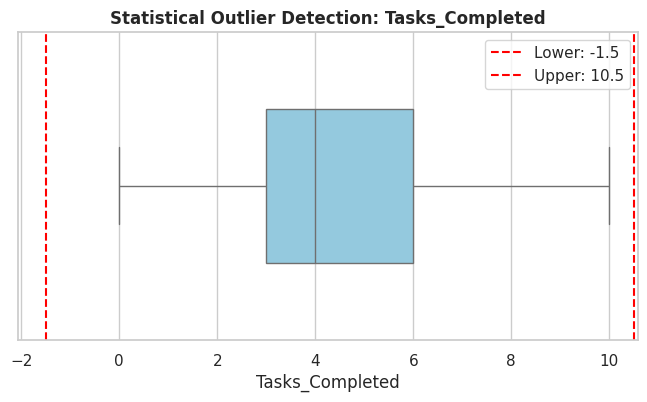

In [104]:
# ==========================================
# CELL 5: RUBRIC C - OUTLIER DETECTION
# ==========================================

def check_outliers(data, col):
    # 1. Mathematical Calculation (Ref: Intro to EDA Slides)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data.query(f"{col} < @lower or {col} > @upper")
    print(f"\n[Outlier Check] {col}: Found {len(outliers)} anomalies.")

    # 2. Visual Representation
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='skyblue', width=0.5)

    # Add vertical lines for the statistical bounds
    plt.axvline(lower, color='red', linestyle='--', label=f'Lower: {lower:.1f}')
    plt.axvline(upper, color='red', linestyle='--', label=f'Upper: {upper:.1f}')

    plt.title(f'Statistical Outlier Detection: {col}', fontweight='bold')
    plt.legend()
    plt.show()

    # 3. Table of Anomalies
    if not outliers.empty:
        display(outliers[['Date', col, 'Type_of_Coffee', 'Caffeine_Level']])

check_outliers(df_clean, 'Tasks_Completed')

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


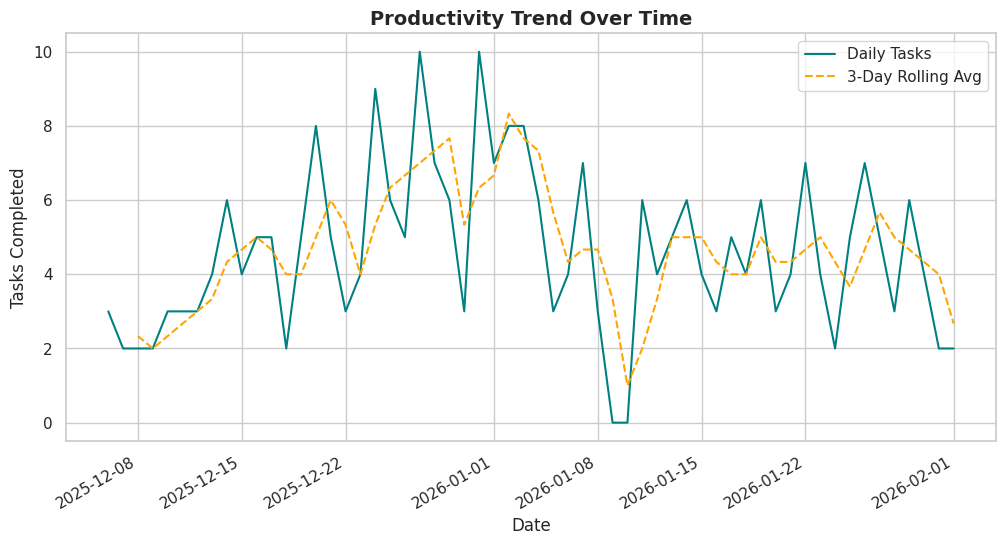

In [105]:
# --- PART 3: TIME SERIES ANALYSIS ---

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x='Date', y='Tasks_Completed', color='teal', label='Daily Tasks')

# Rolling average helps determine if there is a general burnout or improvement trend
df_clean.set_index('Date')['Tasks_Completed'].rolling(3).mean().plot(color='orange', ls='--', label='3-Day Rolling Avg')

plt.title('Productivity Trend Over Time', fontsize=14, fontweight='bold')
plt.ylabel('Tasks Completed')
plt.legend()
plt.show()

/tmp/ipython-input-865574142.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean.dropna(subset=['Caffeine_Level']), x='Caffeine_Level', y='Tasks_Completed', palette="Blues")


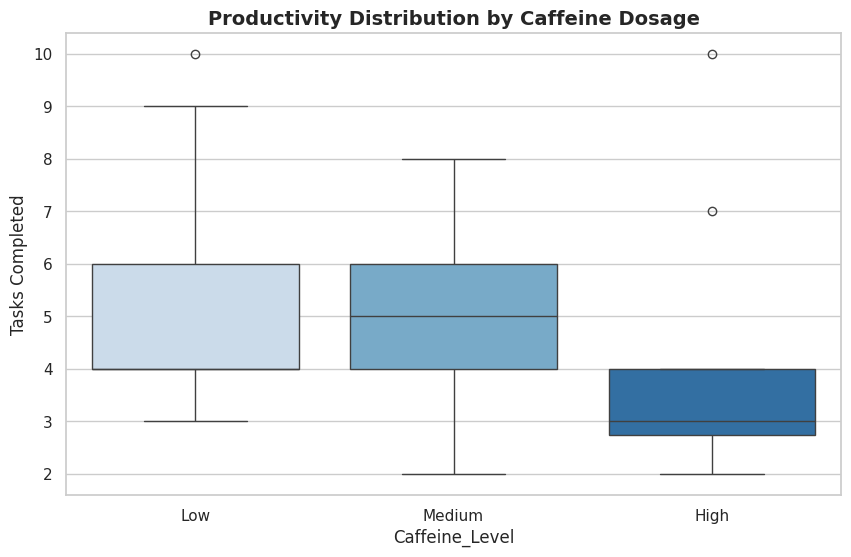

In [106]:
# --- PART 4: BOXPLOT (DOSAGE EFFECT) ---

plt.figure(figsize=(10, 6))
# Dropping NaNs in Caffeine_Level to hide the "0mg" days for a cleaner dosage comparison
sns.boxplot(data=df_clean.dropna(subset=['Caffeine_Level']), x='Caffeine_Level', y='Tasks_Completed', palette="Blues")

plt.title('Productivity Distribution by Caffeine Dosage', fontsize=14, fontweight='bold')
plt.ylabel('Tasks Completed')
plt.show()

/tmp/ipython-input-1063331202.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_clean.dropna(subset=['Est_Sugar_g']).pivot_table(index='Caffeine_Level', columns='Sugar_Level', values='Tasks_Completed')


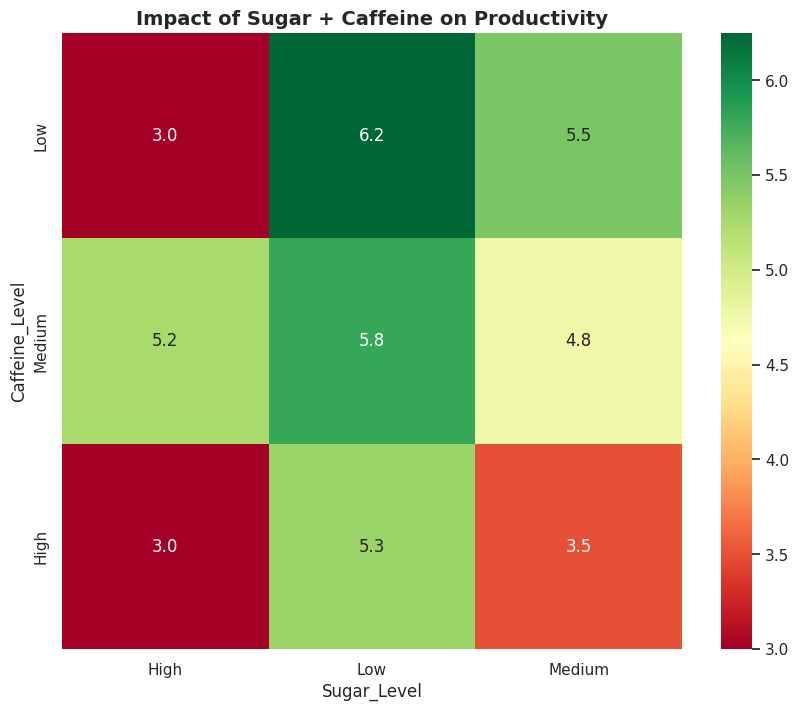

In [107]:
# --- PART 5: HEATMAP (CAFFEINE VS SUGAR) ---

plt.figure(figsize=(10, 8))
# Visualizing the multivariate relationship between dosage, sugar, and output
pivot = df_clean.dropna(subset=['Est_Sugar_g']).pivot_table(index='Caffeine_Level', columns='Sugar_Level', values='Tasks_Completed')
sns.heatmap(pivot, annot=True, cmap='RdYlGn', fmt=".1f")

plt.title('Impact of Sugar + Caffeine on Productivity', fontsize=14, fontweight='bold')
plt.show()

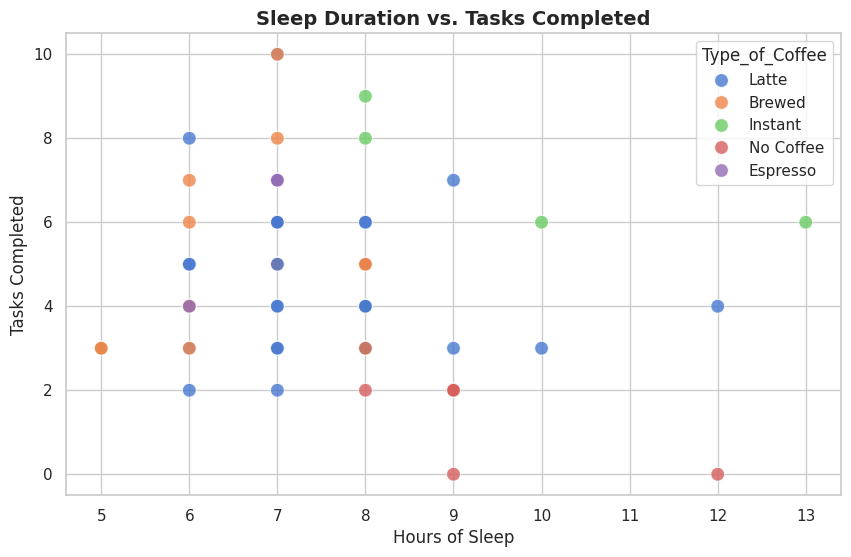

In [108]:
# --- PART 6: SLEEP DURATION VS TASKS ---

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Sleep_Hours', y='Tasks_Completed', hue='Type_of_Coffee', s=100, alpha=0.8)

plt.title('Sleep Duration vs. Tasks Completed', fontsize=14, fontweight='bold')
plt.xlabel('Hours of Sleep')
plt.ylabel('Tasks Completed')
plt.show()

In [109]:
alpha = 0.05

print("--- TEST 1: PEARSON CORRELATION (Caffeine vs. Productivity) ---")
print("H01 (Null): Caffeine Amount has no significant linear effect on productivity.")
print("H11 (Alt): Caffeine Amount has significant effect on productivity.\n")

corr, p_corr = stats.pearsonr(df_clean['Caffeine_Amount_mg'], df_clean['Tasks_Completed'])
print(f"r: {corr:.4f} | P-value: {p_corr:.4f}")

if p_corr < alpha:
    print(f"DECISION: Reject H01. Significant linear correlation detected.")
else:
    print(f"DECISION: Fail to Reject H01. A linear relationship was not detected.")

--- TEST 1: PEARSON CORRELATION (Caffeine vs. Productivity) ---
H01 (Null): Caffeine Amount has no significant linear effect on productivity.
H11 (Alt): Caffeine Amount has significant effect on productivity.

r: 0.1007 | P-value: 0.4522
DECISION: Fail to Reject H01. A linear relationship was not detected.


In [110]:
print("--- TEST 2: ONE-WAY ANOVA (Coffee Type vs. Productivity) ---")
print("H02 (Null): There is no significant difference in productivity based on coffee type.")
print("H12 (Alt): There is a significant difference in productivity based on coffee type.\n")

groups = [df_clean.query(f"Type_of_Coffee == '{t}'")['Tasks_Completed'] for t in df_clean['Type_of_Coffee'].unique()]
f_stat, p_anova = stats.f_oneway(*groups)

print(f"F-Statistic: {f_stat:.4f} | P-value: {p_anova:.4f}")
if p_anova < alpha:
    print(f"DECISION: Reject H02. Significant evidence that coffee type influences productivity.")
else:
    print(f"DECISION: Fail to Reject H02.")

print("\n" + "="*80 + "\n")



--- TEST 2: ONE-WAY ANOVA (Coffee Type vs. Productivity) ---
H02 (Null): There is no significant difference in productivity based on coffee type.
H12 (Alt): There is a significant difference in productivity based on coffee type.

F-Statistic: 4.5899 | P-value: 0.0030
DECISION: Reject H02. Significant evidence that coffee type influences productivity.




                            OLS Regression Results                            
Dep. Variable:        Tasks_Completed   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     7.963
Date:                Wed, 11 Feb 2026   Prob (F-statistic):           0.000918
Time:                        15:51:11   Log-Likelihood:                -120.54
No. Observations:                  58   AIC:                             247.1
Df Residuals:                      55   BIC:                             253.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2529      0.719      3.133      0.0

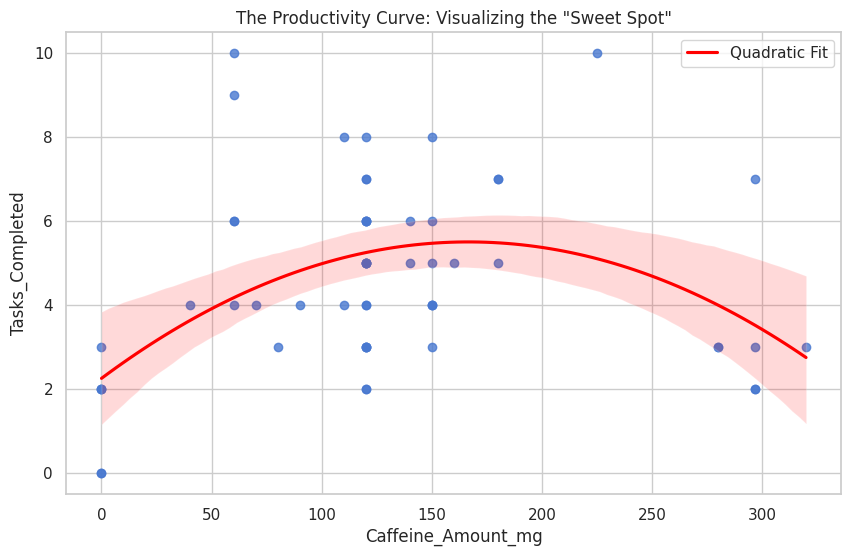

In [111]:
# ==========================================
# CELL 11: RUBRIC F - MODELING
# ==========================================
X = df_clean['Caffeine_Amount_mg']
y = df_clean['Tasks_Completed']
X_poly = sm.add_constant(pd.DataFrame({'Caff': X, 'Caff_Sq': X**2}))

model = sm.OLS(y, X_poly).fit()
print(model.summary())

# Plotting the Fit
plt.figure(figsize=(10, 6))
sns.regplot(x='Caffeine_Amount_mg', y='Tasks_Completed', data=df_clean, order=2,
            line_kws={'color':'red', 'label':'Quadratic Fit'})
plt.title('The Productivity Curve: Visualizing the "Sweet Spot"')
plt.legend()
plt.show()